In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import h5py

In [7]:
f = h5py.File('../random_nucl_den_20.h5','r')
dataset_name = list(f.keys())[0]
dataset = f[dataset_name]
# shape: [z, y, x, components]
dshape = dataset.shape 
# attributes
attrs = {}
idx_attrs = {}
for (idx, item) in enumerate(dataset.attrs):
    attrs[item] = dataset.attrs[item][0]
    idx_attrs[idx] = dataset.attrs[item][0]

The dset is ordered as [z,y,x, component].

In [18]:
f.close()

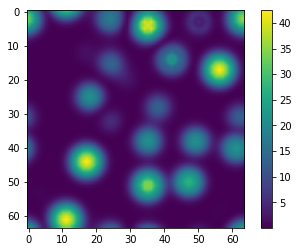

In [8]:
plt.imshow(dataset[dshape[0]/2,:,:,2], interpolation = 'bilinear')
plt.colorbar()
plt.show()

In [13]:
dataset.shape

(64, 64, 64, 3)

In [9]:
attrs = {}
for item in dataset.attrs:
    attrs[item] = dataset.attrs[item][0]

In [17]:
idx_attrs

{0: b'TotalEnergy', 1: b'MagneticEnergy', 2: b'HiggsMagnitude2'}